In [1]:
# Need to do this before importing RV when running in a Docker container from VS Code.
# This has to do with the fact that VS Code is not setting env vars in the notebook correctly.
import os
os.environ['GDAL_DATA'] = '/opt/conda/lib/python3.7/site-packages/rasterio/gdal_data/'

%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join

from rastervision.pytorch_learner.dataset import SemanticSegmentationSlidingWindowGeoDataset
from rastervision.pytorch_learner.visualizer import SemanticSegmentationVisualizer
from rastervision.core.data import ClassConfig

In [7]:
CLASS_NAMES = [
    'Car', 'Building', 'Low Vegetation', 'Tree', 'Impervious', 'Clutter'
]
CLASS_COLORS = [
    '#ffff00', '#0000ff', '#00ffff', '#00ff00', '#ffffff', '#ff0000'
]
class_config = ClassConfig(names=CLASS_NAMES, colors=CLASS_COLORS)
channel_order = [0, 1, 2, 3]
channel_display_groups = {'RGB': (0, 1, 2), 'IR': (3, )}

raw_uri = 's3://raster-vision-raw-data/isprs-potsdam'
image_uri = join(raw_uri, f'4_Ortho_RGBIR/top_potsdam_2_10_RGBIR.tif')
label_uri = join(raw_uri, f'5_Labels_for_participants/top_potsdam_2_10_label.tif')

ds = SemanticSegmentationSlidingWindowGeoDataset.from_uris(
    class_config=class_config,
    image_uri=image_uri,
    label_raster_uri=label_uri,
    size=300,
    stride=150,
    image_raster_source_kw={'channel_order': channel_order})

2022-09-06 22:12:58:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/raster-vision-raw-data/isprs-potsdam/4_Ortho_RGBIR/top_potsdam_2_10_RGBIR.tif.
2022-09-06 22:13:00:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/raster-vision-raw-data/isprs-potsdam/5_Labels_for_participants/top_potsdam_2_10_label.tif.
2022-09-06 22:13:00:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/raster-vision-raw-data/isprs-potsdam/4_Ortho_RGBIR/top_potsdam_2_10_RGBIR.tif.
2022-09-06 22:13:01:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/raster-vision-raw-data/isprs-potsdam/5_Labels_for_participants/top_potsdam_2_10_label.tif.


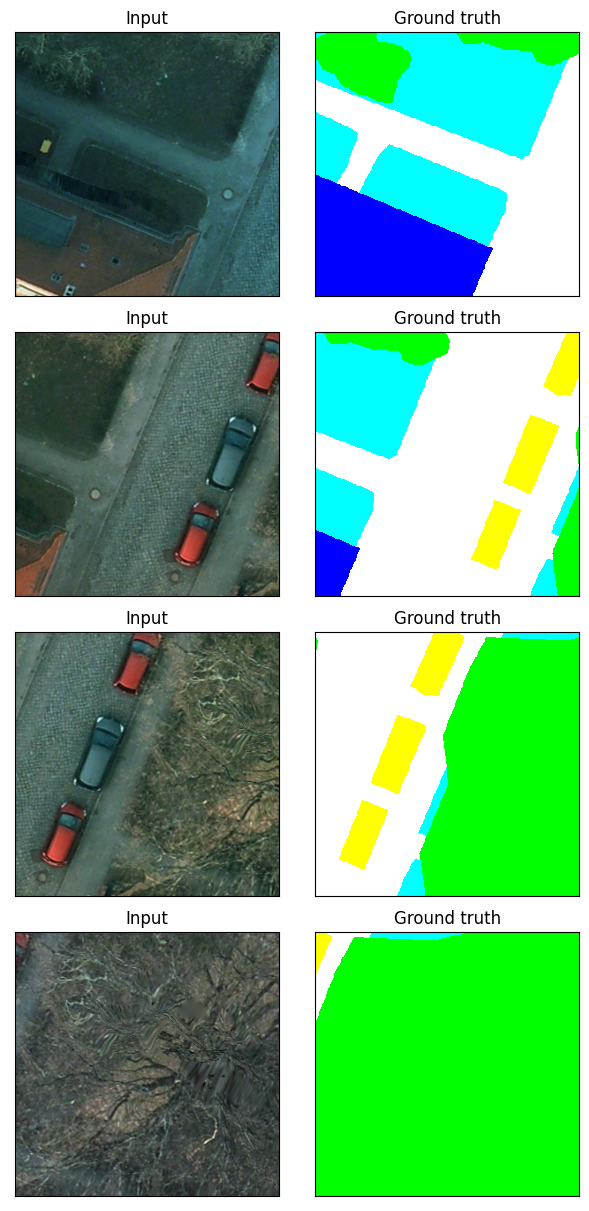

In [4]:
vis = SemanticSegmentationVisualizer()
x, y = vis.get_batch(ds, 4)
vis.plot_batch(x, y, show=True)

In [6]:
y.shape

torch.Size([4, 300, 300, 3])

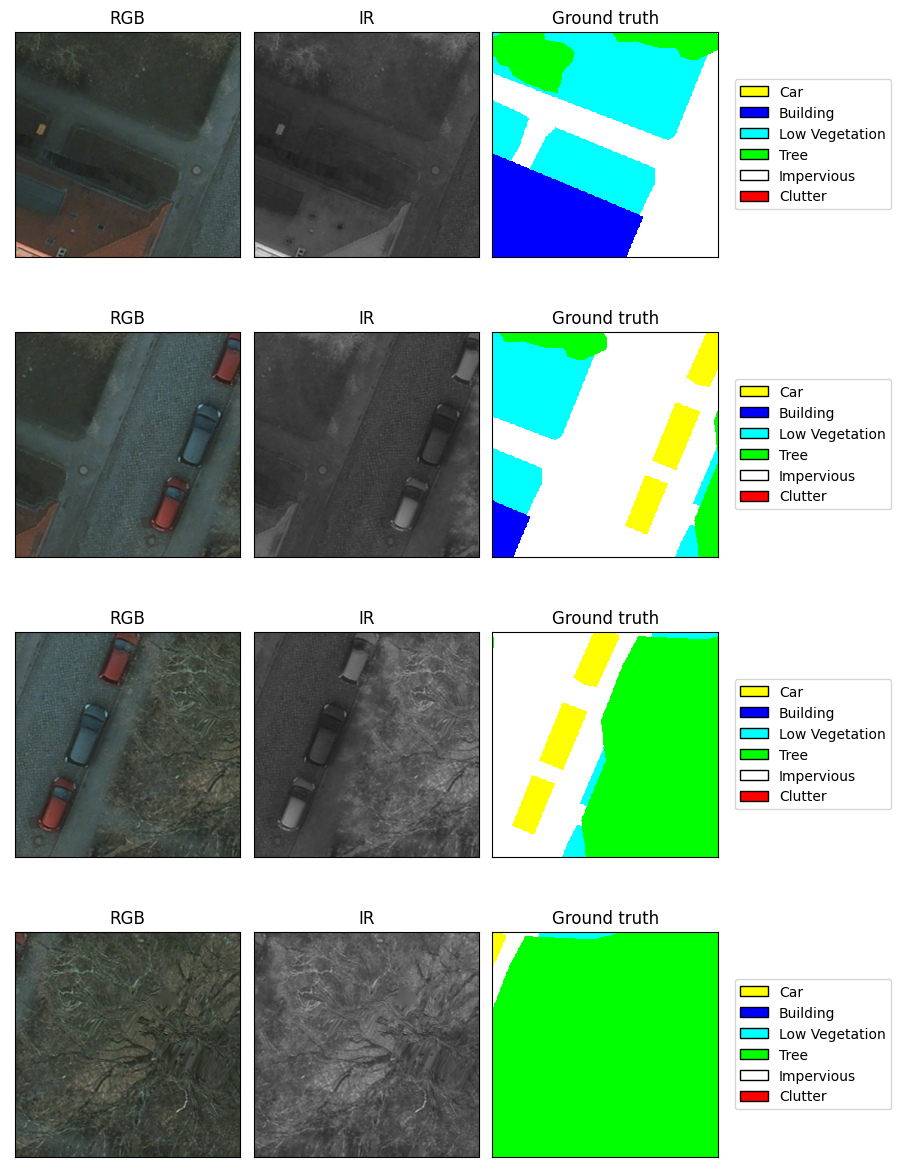

In [11]:
vis = SemanticSegmentationVisualizer(
    CLASS_NAMES, CLASS_COLORS, channel_display_groups=channel_display_groups)
vis.plot_batch(x, y, show=True)